**Assignment 1 - Question 1 (Five Exercises)**

**Ryan Reed**

**COS 470**
 
**Note :** All exercises are within this notebook file. All are done & appear correct. Coded in colab, so required text, csv, and tsv documents had been uploaded to colab session storage.

**Additional Note:** I looked at the code uploaded to brightspace only after finishing these with my own correct solutions, for problem-solving experience.

#Exercise 1

1. Print odd numbers in range 0 to 100
2. Write a function that returns summation of even numbers in a range(start, end) and both start and end are included in the summation.
3. Define an empty list
  *   Add 10 random integer numbers in range [1,100] to the list
  *   Print the maximum number in the list
  *   Print the minimum number in the list
  *   Sort the list
  *   Randomly shuffle the list
  *   try running the sort part of code with "Run the focused cell"
4. Define a dictionary as: {'a':1, 'd':4, 'b':2, 'c':3}
  *   Sort the dictionary by keys
  *   Sort the dictionary by values in descending order
  *   Add new tuple to the dictionary {'e':5}















In [1]:
# 1
only_odd_in_range = [x for x in range(0,100) if x % 2 == 1]
print(only_odd_in_range)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [2]:
# 2
def even_summation_inclusive(start, end):
  only_even = [x for x in range(start - 1, end + 1) if x % 2 == 0]
  sum_of_even = sum(only_even)
  return sum_of_even

print(even_summation_inclusive(0, 10))

30


In [3]:
# 3
import random

list = []
list = random.sample(range(1, 100), 10)

print("The max value in the list is:", max(list))
print("The min value in the list is:", min(list))

print("List before sort:", list)
list.sort()
print("List after sort:", list)
random.shuffle(list)
print("List after a shuffle:", list)

The max value in the list is: 96
The min value in the list is: 3
List before sort: [68, 51, 3, 26, 63, 96, 32, 8, 44, 61]
List after sort: [3, 8, 26, 32, 44, 51, 61, 63, 68, 96]
List after a shuffle: [26, 3, 68, 32, 96, 44, 61, 51, 8, 63]


In [4]:
# 3 (Continued)
list.sort()
print("List after a sort ran as focused cell:", list)

List after a sort ran as focused cell: [3, 8, 26, 32, 44, 51, 61, 63, 68, 96]


In [5]:
# 4
# used different values in the dict, having them be (1, 2, 3, 4) seems a bit confusing in terms of
# sorting them, as they already are by value.
val_dict = {'a':6, 'd':10, 'b':5, 'c':1}
dictSortKeys = dict(sorted(val_dict.items()))
print("Dictionary sorted by Keys :", dictSortKeys)

dictSortValuesReverse = dict(sorted(val_dict.items(), key=lambda x:x[1], reverse=True))
print("Dictionary sorted by Value (Reversed) :", dictSortValuesReverse)

tupleToAdd = ('e', 5)

val_dict.update({tupleToAdd[0]: tupleToAdd[1]})
print("Dictionary after adding tuple ('e', 5) :", val_dict)



Dictionary sorted by Keys : {'a': 6, 'b': 5, 'c': 1, 'd': 10}
Dictionary sorted by Value (Reversed) : {'d': 10, 'a': 6, 'b': 5, 'c': 1}
Dictionary after adding tuple ('e', 5) : {'a': 6, 'd': 10, 'b': 5, 'c': 1, 'e': 5}


#Exercise 2

Go to TF-IDF wikipedia page and copy the first 3-Sentences (above motivation)

Test turning the debug mode on and off with command: !pdb on and !pdb off


  1.   Define a string with this paragraph as the value
  2.   Write a program that prints the number of total words and the number of total unique words in this paragraph
  3. Which word has the most frequency? (write a program for this)
  4. Read the TFIDG.txt file as the string and test if you will get the same results
  5. Use NLTK library and remove the stop-words. What is the most frequent word now?
  



In [7]:
%pdb on

Automatic pdb calling has been turned ON


In [8]:
%pdb off

Automatic pdb calling has been turned OFF


In [9]:
#imports
import re
from collections import defaultdict
from google.colab import files
import io
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

paragraph = "In information retrieval, tf–idf (also TF*IDF, TFIDF, TF–IDF, or Tf–idf), short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general."

#function to clean the string and return a list of words
def string_cleaner(string):
  clean_words = re.sub(r"[(,.;@#?*!&$)]+\ *", " ", string.lower())
  split_words = re.split(" ",clean_words)
  #remove empty strings
  while("" in split_words) :
    split_words.remove("")
  
  #list of split words is now clean information, not raw data
  return split_words


def num_words_num_unique_words(list_words):
  print("The total number of words: ", len(list_words))
  set_of_words = set(list_words)
  print("The total number of unique words: ", len(set_of_words))

cleaned_data = string_cleaner(paragraph)

num_words_num_unique_words(cleaned_data)

The total number of words:  103
The total number of unique words:  62


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
def most_frequent_word(list_words):
  word_dict = defaultdict(int)
  for word in list_words:
    word_dict[word] += 1
  print("The most frequent word is :",max(word_dict, key = word_dict.get,))

most_frequent_word(cleaned_data)

The most frequent word is : the


In [11]:
#using text file
file_path = 'TFIDF.txt'
with open(file_path, 'r') as text_file:
  input_text = text_file.read()

cleaned_text_data = string_cleaner(input_text)

num_words_num_unique_words(cleaned_text_data)
most_frequent_word(cleaned_text_data)

The total number of words:  103
The total number of unique words:  62
The most frequent word is : the


In [12]:
#filtering out stop words
stop_words = set(stopwords.words('english'))

filtered_text_data = [word for word in cleaned_text_data if word not in stop_words]
most_frequent_word(filtered_text_data)

The most frequent word is : tf–idf


#Exercise 3

Target file: quotes.tsv (tab-seperated values)

Read the TSV file with pandas library. Install the library with command: ! pip install pandas

Answer the following questions


  1.   How many quotes are from 'Alexandre Dumas'
  2.   Who has the longest quote? (number of words)
  3.   In whose quote there is the word 'one'? Name the author(s)
  4.   What are the most and least frequent words used in all the quotes?



In [12]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# 1 
import pandas as pd

file_path = "quotes.tsv"
with open(file_path, 'r') as quotes_file:
  quotes_dataframe = pd.read_csv(quotes_file, sep='\t')
print("There is a approximately %d quotes from Alexandre Dumas" %(quotes_dataframe['Author'].value_counts()['Alexandre Dumas']))

There is a approximately 10 quotes from Alexandre Dumas


In [14]:
# 2
import numpy as np

max_length_quote_id = quotes_dataframe["Quote"].str.len().idxmax()
print("---Longest Quote---\nAuthor : ", quotes_dataframe["Author"][max_length_quote_id], "\nWord Count :",
      len(quotes_dataframe["Quote"][max_length_quote_id]), "\nQuote :", quotes_dataframe["Quote"][max_length_quote_id])

---Longest Quote---
Author :  Arthur Conan Doyle 
Word Count : 550 
Quote : To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen.... And yet there was but one woman to him, and that woman was the late Irene Adler, of dubious and questionable memory.


In [15]:
# 3
quotes_dataframe['containsOne'] = [1 if 'one' in s.lower() else 0 for s in quotes_dataframe['Quote']]
contains_one_authors = set()
for index, row in quotes_dataframe.iterrows(): 
  if (row['containsOne'] == 1):
    contains_one_authors.add(row['Author'])

print("Authors whose quotes include the word 'one' :")
for author in contains_one_authors:
  print(author)

Authors whose quotes include the word 'one' :
Agatha Christie
Alexandre Dumas
Arthur Conan Doyle
Anton Chekhov


In [16]:
# 4
union_of_quotes = ""
quotes_word_dict = {}

for index, row in quotes_dataframe.iterrows():
  union_of_quotes += row['Quote']
# string_cleaner function made in exercise 2, I thought it would be a smart move to reuse it for my exercise 3 solution.
union_of_quotes = string_cleaner(union_of_quotes)
# stop word exclusion, they're a mess for determining frequency of important words
union_of_quotes = [word for word in union_of_quotes if word not in stop_words]

for word in union_of_quotes:
  if word not in quotes_word_dict:
    quotes_word_dict[word] = 0
  quotes_word_dict[word] += 1

print("The five MOST frequently occuring words :")
five_most_freq = sorted(quotes_word_dict.items(), key = lambda x: x[1], reverse=True) [:5]
for value in five_most_freq:
  print(value)

print("\nThe five LEAST frequently occuring words :")
five_least_freq =sorted(quotes_word_dict.items(), key = lambda x: x[1], reverse=False) [:5]
for value in five_least_freq:
  print(value)

The five MOST frequently occuring words :
('one', 11)
('always', 10)
('like', 7)
('must', 7)
('life', 6)

The five LEAST frequently occuring words :
('sometimes', 1)
('wildly', 1)
('despairingly', 1)
('acutely', 1)
('miserable', 1)


#Exercise 4

Target file: 'Posts_Coffee.xml' (Snapshot of https://coffee.stackexchange.com/)

Use the code 'post_reader.py' from here:
https://github.com/ARQMath/ARQMathCode/blob/master/Entity_Parser_Record/post_parser_record.py

Answer the following questions:
   

1.   How many questions/answers have been posted on this website?
2.   How many questions, have accepted answers?
3.   What is the highest/lowest score given to the questions?
4.   What is the average number of words in answers?
5.   In which year, the highest number of posts (questions/answers) were posted?




In [3]:
from post_parser_record import PostParserRecord
post_reader = PostParserRecord("Posts_Coffee.xml")

#1
number_questions = len(post_reader.map_questions.keys())
number_answers = len(post_reader.map_just_answers.keys())

print("The number of questions is: " +str(number_questions))
print("The number of answers is: " +str(number_answers))

The number of questions is: 1370
The number of answers is: 2702


In [4]:
#2
num_questions_accepted_answers = (num_questions_accepted_answers + 1 for v in post_reader.map_questions
                                   if v(accepted_answer_id) != 0)
num_questions_accepted_answers = 0
for question in post_reader.map_questions:
  if (post_reader.map_questions[question].accepted_answer_id != None):
    num_questions_accepted_answers += 1;
print("The number of questions with accepted answers: ", num_questions_accepted_answers)

The number of questions with accepted answers:  651


In [5]:
#3
highestScore = 0
lowestScore = 0

for question in post_reader.map_questions:
  if (post_reader.map_questions[question].score > highestScore):
    highestScore = post_reader.map_questions[question].score
  elif (post_reader.map_questions[question].score < lowestScore):
    lowestScore = post_reader.map_questions[question].score
print("The highest question score is :", highestScore)
print("\nThe lowest question score is :", lowestScore)


The highest question score is : 66

The lowest question score is : -3


In [13]:
#4
answers_body_raw_data = ""

for answer in post_reader.map_just_answers:
  answers_body_raw_data += post_reader.map_just_answers[answer].body
# filters out xml tags
answers_body_raw_data =  re.sub('<[^<]+>', "",  answers_body_raw_data)

# filters out punctuation
answers_body_data = string_cleaner(answers_body_raw_data)

print("The total number of words across all answers is :",
      len(answers_body_data))
print("\nThe total number of answers is :", len(post_reader.map_just_answers.keys()))
print("\nThus the average word count per answer is :", len(answers_body_data) / len(post_reader.map_just_answers.keys()))

# Solution appears correct at ~156 words on average per answer. After manually checking some answers on the site, this seems to be
# within a reasonable realistic range.

The total number of words across all answers is : 420789

The total number of answers is : 2702

Thus the average word count per answer is : 155.73242042931162


In [26]:
#5
dict_year = {}
for questionIndex in post_reader.map_questions:
  currYear = ((post_reader.map_questions[questionIndex].creation_date).split("-"))[0]
  if currYear not in dict_year:
    dict_year[currYear] = 0
  dict_year[currYear] += 1

year_with_most_posts = sorted(dict_year.items(), key = lambda x: x[1], reverse=False).pop()
print("Year with most posts :", year_with_most_posts[0])
print("Posts within that year :", year_with_most_posts[1])



Year with most posts : 2015
Posts within that year : 437


#Exercise 5

Use NumPy and Matplotlib libraries to draw the chart from the previous session

IR System 1

R 0.00 | 0.00 | 0.00 | 0.25 | 0.50 | 0.50 | 0.50 | 0.75 | 0.75 | 1.00

P 0.00 | 0.00 | 0.00 | 0.25 | 0.40 | 0.33 | 0.29 | 0.38 | 0.33 | 0.40


---



IR System 2

R 0.25 | 0.25 | 0.25 | 0.50 | 0.50 | 0.75 | 0.75 | 0.75 | 1.00 | 1.00

P 1.00 | 0.50 | 0.33 | 0.50 | 0.40 | 0.50 | 0.43 | 0.38 | 0.44 | 0.40

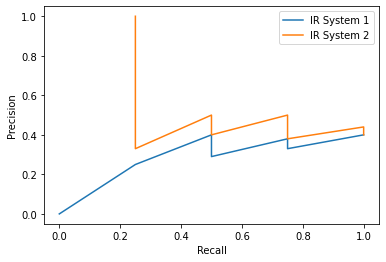

In [37]:
import matplotlib
import matplotlib.pyplot as plt

one_x = [0.00 , 0.00 , 0.00 , 0.25 , 0.50 , 0.50 , 0.50 , 0.75 , 0.75 , 1.00]
one_y = [0.00 , 0.00 , 0.00 , 0.25 , 0.40 , 0.33 , 0.29 , 0.38 , 0.33 , 0.40]

two_x = [0.25 , 0.25 , 0.25 , 0.50 , 0.50 , 0.75 , 0.75 , 0.75 , 1.00 , 1.00]
two_y = [1.00 , 0.50 , 0.33 , 0.50 , 0.40 , 0.50 , 0.43 , 0.38 , 0.44 , 0.40]

plt.plot(one_x, one_y, label = "IR System 1")
plt.plot(two_x, two_y, label = "IR System 2")

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend()
plt.show()